In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

## Student dataset

In [2]:
# Load the data into a pandas DataFrame
students_data = pd.read_csv('students_data.csv', delimiter=';')
# Extract the target variable 'Target' as y
y_student = students_data[['Target']]

# Extract all other columns as X (excluding 'Target')
X_student = students_data.drop('Target', axis=1)

In [3]:
X_student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [4]:
y_student.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [5]:
# Preprocessing the data by checking for missing values
if X_student.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There is a missing value in the dataset.")

# Check for duplicate rows
if X_student.duplicated().sum() == 0:
    print("There are no duplicate rows in the dataset.")

# Check for duplicate columns
if X_student.columns.duplicated().sum() == 0:
    print("There are no duplicate columns in the dataset.")


There are no missing values in the dataset.
There are no duplicate rows in the dataset.
There are no duplicate columns in the dataset.


/home/funny/.virtualenvs/machinelearning/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


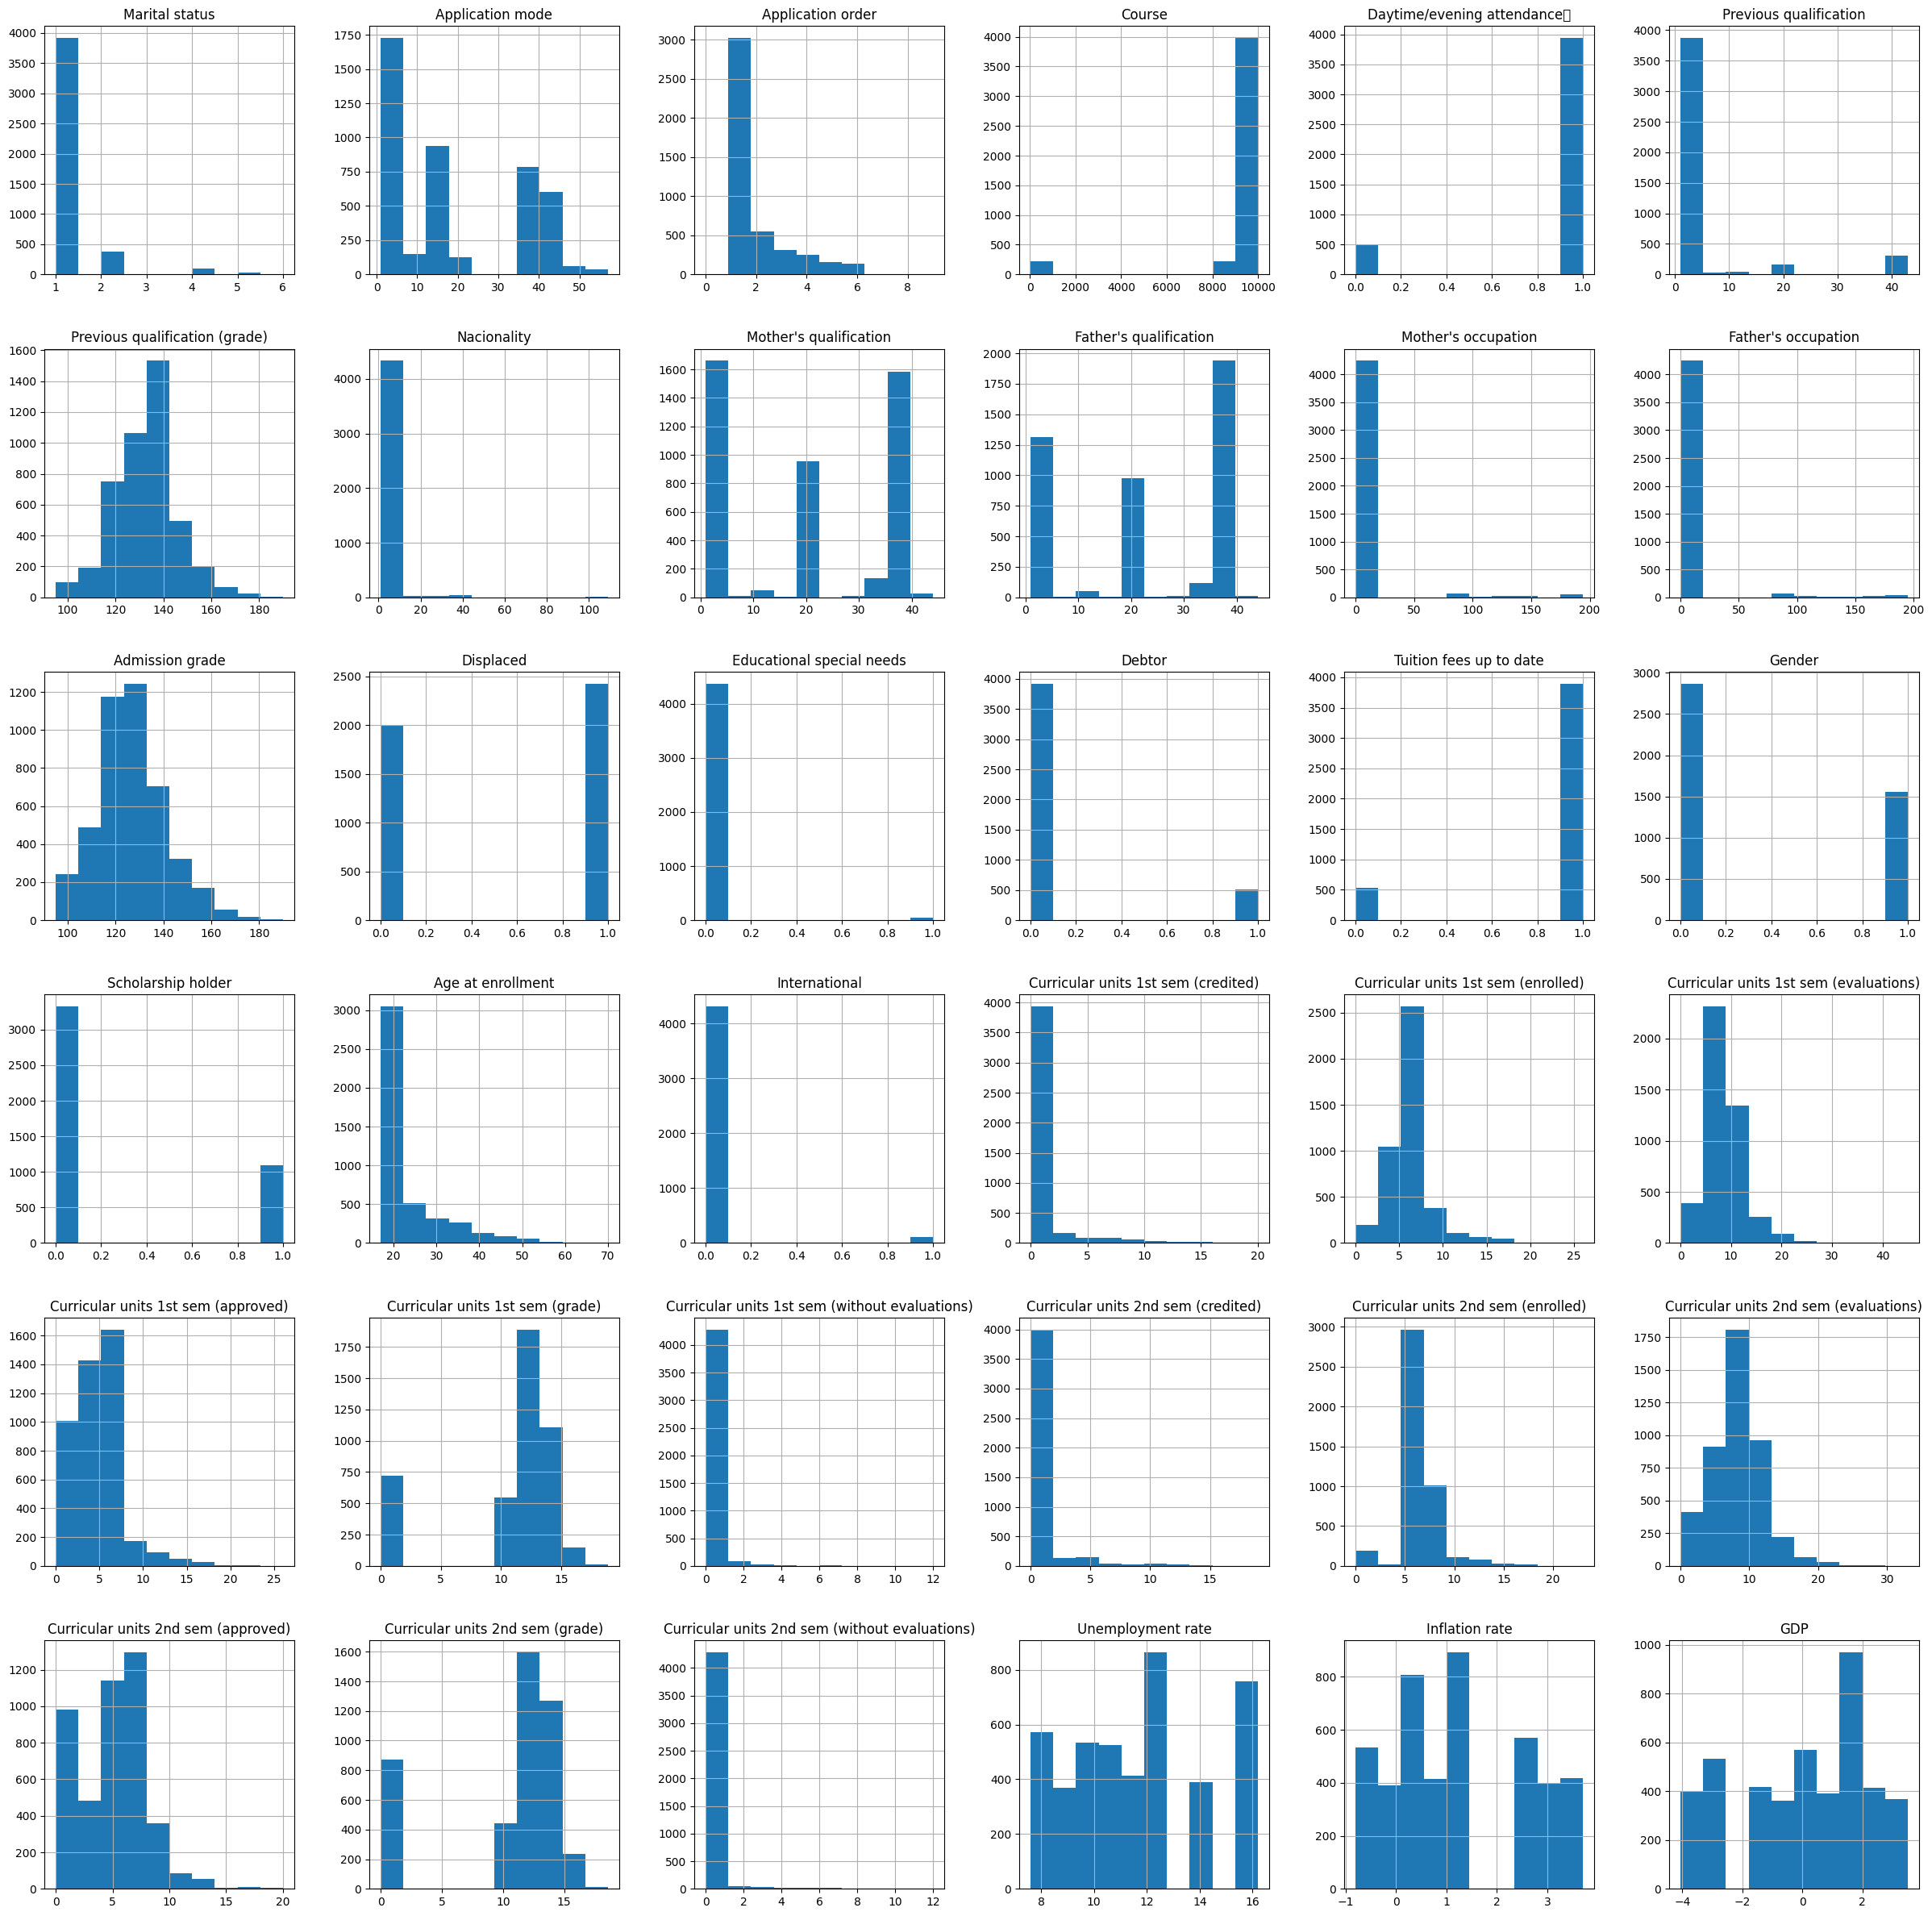

In [6]:
X_student.hist(figsize=(30, 30))
plt.show()

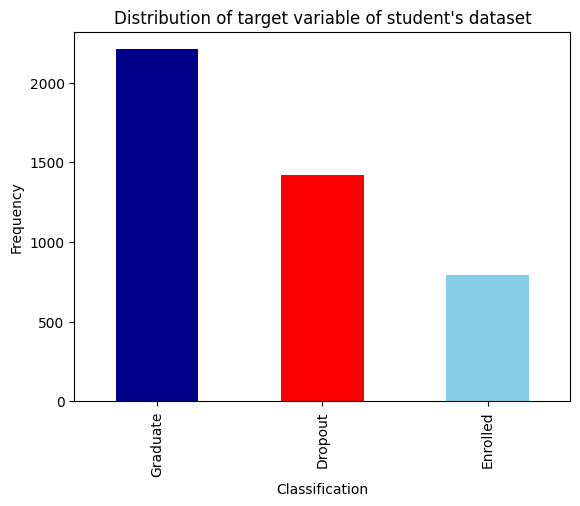

In [7]:
# Plot the target variable
df = pd.DataFrame(y_student)
df.head()
# Plot the histogram
df['Target'].value_counts().plot(kind='bar', color=['darkblue', 'red', 'skyblue'])
# Adding title and labels
plt.title("Distribution of target variable of student's dataset")
plt.xlabel('Classification')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Investigate numeric value range of attributes

In [8]:
df_students = pd.concat([X_student, y_student], axis=1)
df_students

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [9]:
df_students.describe().loc[["min", "max"]]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
min,1.0,1.0,0.0,33.0,0.0,1.0,95.0,1.0,1.0,1.0,0.0,0.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,7.6,-0.8,-4.06
max,6.0,57.0,9.0,9991.0,1.0,43.0,190.0,109.0,44.0,44.0,194.0,195.0,190.0,1.0,1.0,1.0,1.0,1.0,1.0,70.0,1.0,20.0,26.0,45.0,26.0,18.875,12.0,19.0,23.0,33.0,20.0,18.571429,12.0,16.2,3.7,3.51


## MPG dataset

In [10]:
# Define column names for the dataset
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

data = pd.read_csv('auto-mpg.data', sep='\\s+', header=None, names=columns, quotechar='"')

# Display the first few rows to verify
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [11]:
X_car = data.drop('mpg', axis=1)
X_car.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [12]:
y_car = data[['mpg']]
y_car.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [13]:
# Get unique values of column "cylinders"
X_car["cylinders"].unique()

array([8, 4, 6, 3, 5])

In [14]:
# Validate that only column "horsepower" includes null values
X_car.isnull().any()

cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [15]:
# Create boolean mask for null values and filter dataset accordingly
nan_bool_mask = X_car.isnull().any(axis=1)

X_car[nan_bool_mask]

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name


In [16]:
# Preprocessing the data by checking for missing values
if X_car.isnull().sum().sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There is a missing value in the dataset.")

# Check for duplicate rows
if X_car.duplicated().sum() == 0:
    print("There are no duplicate rows in the dataset.")

# Check for duplicate columns
if X_car.columns.duplicated().sum() == 0:
    print("There are no duplicate columns in the dataset.")

There are no missing values in the dataset.
There are no duplicate rows in the dataset.
There are no duplicate columns in the dataset.


This result is misleading since we know that there are null values but the code can not recognize it yet.

In [17]:
# Replace '?' with NaN (pandas recognizes NaN as missing values)
X_car.replace('?', pd.NA, inplace=True)

# Check if there are any missing values
missing_values = X_car.isnull().sum()
missing_values

cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

As provided by the result above, the null values are observed now and there are six null values marked with a question mark in this dataset in the horsepower column.

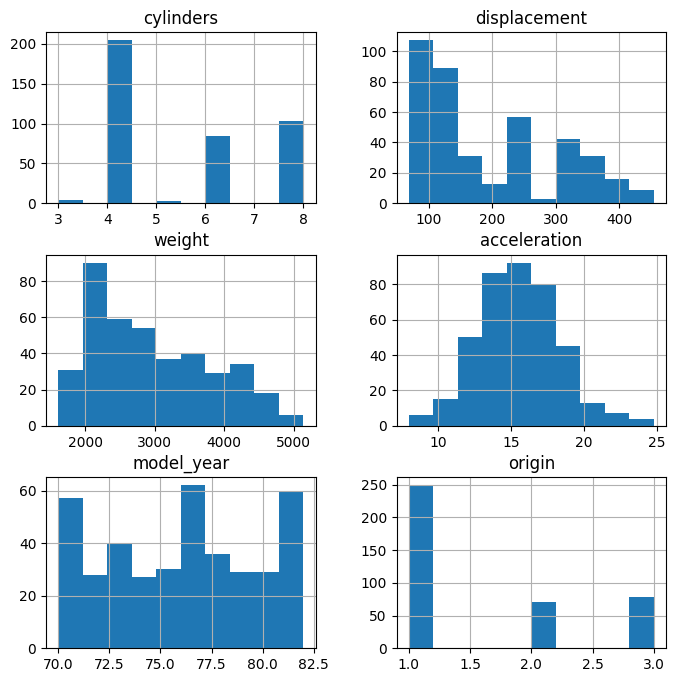

In [18]:
X_car.hist(figsize=(8, 8))
plt.show()

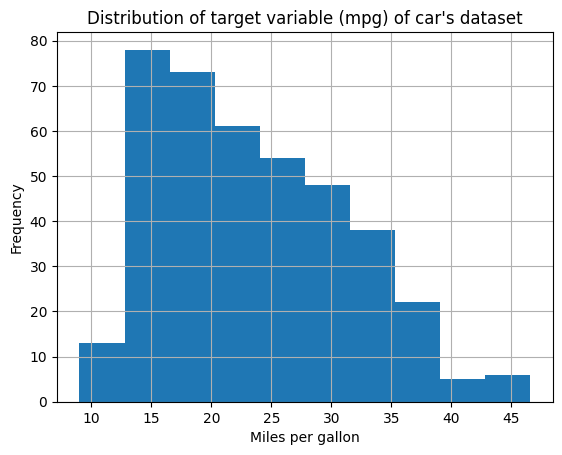

In [19]:
# Plot the histogram
y_car.hist()
plt.title("Distribution of target variable (mpg) of car's dataset")
plt.xlabel('Miles per gallon')
plt.ylabel('Frequency')
plt.show()


### Investigate numeric value range of attributes

In [21]:
df_car = pd.concat([X_car, y_car], axis=1)
df_car

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl,27.0
394,4,97.0,52.00,2130.0,24.6,82,2,vw pickup,44.0
395,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage,32.0
396,4,120.0,79.00,2625.0,18.6,82,1,ford ranger,28.0


In [22]:
df_car.describe().loc[["min", "max"]]

,cylinders,displacement,weight,acceleration,model_year,origin,mpg
min,3.0,68.0,1613.0,8.0,70.0,1.0,9.0
max,8.0,455.0,5140.0,24.8,82.0,3.0,46.6
